![logos](https://github.com/Lodur03/ManGAN/blob/master/header.png?raw=true)


All data will be downloaded from [safebooru](http://safebooru.org/). Since it contains mostly colored images, I will be saving the original version a standard size (512x512) and also a "line-art version" that will be obtained through edge detection.


### Dependencies

In [2]:
import urllib2
import urllib
import json
import numpy as np
import cv2
import untangleimport matplotlib.pyplot as plt

### Auxiliary Functions

To show the download progress:

In [9]:
def progress_bar(iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print '\r%s |%s| %s%% %s\r' % (prefix, bar, percent, suffix)

    if iteration == total: 
        print "Finished"

Mantaining standard proportion (*n x n*):

In [26]:
def img_cropping(image, height, width):
        
    if(height > width):
        scalefactor = (maxsize*1.0) / width
        res = cv2.resize(image,(int(width * scalefactor), int(height*scalefactor)), interpolation = cv2.INTER_CUBIC)
        cropped = res[0:maxsize,0:maxsize]
    elif(width > height):
        scalefactor = (maxsize*1.0) / height
        res = cv2.resize(image,(int(width * scalefactor), int(height*scalefactor)), interpolation = cv2.INTER_CUBIC)
        center_x = int(round(width*scalefactor*0.5))
        cropped = res[0:maxsize,center_x - maxsize/2:center_x + maxsize/2]
    else:
        cropped = image
        
    return cropped

## Collect

Params to change:

In [102]:
save_dir = r"C:\Users\T-Gamer\Desktop\dataset" 
total_it = 10 
maxsize = 512 # images will be maxsize x maxsize

Download it:

In [30]:
for i in xrange(total_it):
    scrap_url = "http://safebooru.org/index.php?page=dapi&s=post&q=index&tags=1girl%20solo&pid="
    stringreturn = urllib2.urlopen(scrap_url +str(i+3000)).read()
    xmlreturn = untangle.parse(stringreturn)
    
    for post in xmlreturn.posts.post:
        imgurl = "http:" + post["sample_url"]
        
        if ("png" in imgurl) or ("jpg" in imgurl):

            resp = urllib.urlopen(imgurl)
            image = np.asarray(bytearray(resp.read()), dtype="uint8")
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            height, width = image.shape[:2]
            
            cropped = img_cropping(image, height, width)
            
            img_grey = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
            img_edge = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=2)
                        
            cv2.imwrite(save_dir+r'\imgs'+str(post["id"])+".jpg", cropped)
            cv2.imwrite(save_dir+r'\imgs'+str(post["id"])+"-edge.jpg", img_edge)
            
    progress_bar(i, total_it)

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 



We can visualize a couple images. To make it easy, let's first create a helper function:

In [121]:
def viz_images(names):
    ''' Receives four image names in a list to plot from save_dir'''
    w=10
    h=10
    fig=plt.figure(figsize=(15, 15))
    columns = 4
    rows = 1

    for i in range(1, columns*rows +1):
        
        bgr_img = cv2.imread(save_dir + names[i-1])
        img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)

    plt.show()

Now that it's done, start by showing a couple examples:

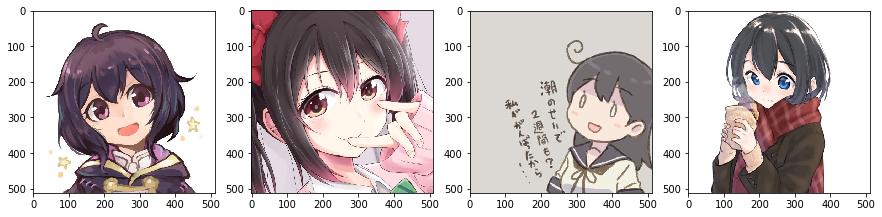

In [124]:
img_colored = [r'\imgs2692925.jpg', r'\imgs2671964.jpg', r'\imgs2693798.jpg', r'\imgs2693643.jpg']
viz_images(img_colored)

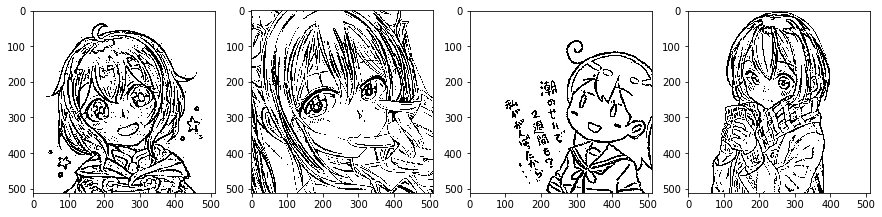

In [125]:
img_edge = [r'\imgs2692925-edge.jpg', r'\imgs2671964-edge.jpg', r'\imgs2693798-edge.jpg', r'\imgs2693643-edge.jpg']
viz_images(img_edge)

And now the data is collected. :)